In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("C:\\Users\\hp\\Downloads\\P16-Self-Organizing-Maps\\Self_Organizing_Maps\\Credit_Card_Applications.csv")
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [6]:
from minisom import MiniSom

In [7]:
som=MiniSom(10,10,input_len=15)

In [8]:
som.random_weights_init(x)

In [9]:
som.train_random(data=x,num_iteration=100)

In [10]:
from pylab import bone,pcolor,colorbar,plot,show

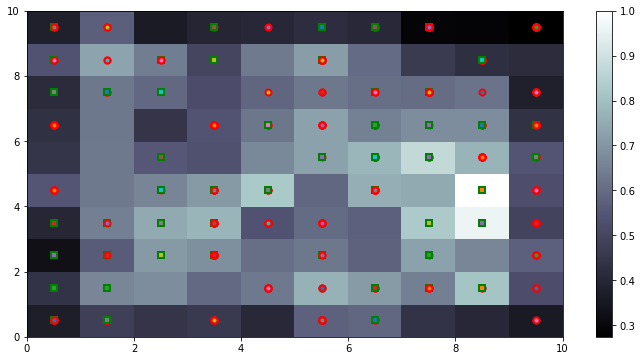

In [11]:
plt.figure(figsize=(12,6))
bone()
pcolor(som.distance_map().T)
colorbar()
markers=["o","s"]
color=["r","g"]
for i,X in enumerate(x):
    w=som.winner(X)
    plot((w[0]+0.5),(w[1]+0.5),markers[y[i]],markeredgecolor=color[y[i]],markeredgewidth=2)

In [14]:
mappings=som.win_map(x)
frauds=np.concatenate((mappings[(8,4)],mappings[(8,3)]),axis=0)

In [15]:

frauds=pd.DataFrame(sc.inverse_transform(frauds))
frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15585855.0,1.0,40.25,21.500,2.0,10.0,9.0,20.000,1.0,1.0,11.0,0.0,2.0,0.0,1201.0
1,15661412.0,1.0,48.75,8.500,2.0,8.0,8.0,12.500,1.0,1.0,9.0,0.0,2.0,181.0,1656.0
2,15799785.0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0,16.0
3,15589881.0,1.0,28.92,15.000,2.0,8.0,8.0,5.335,1.0,1.0,11.0,0.0,2.0,0.0,2284.0
4,15602456.0,1.0,48.17,7.625,2.0,9.0,8.0,15.500,1.0,1.0,12.0,0.0,2.0,0.0,791.0
5,15789611.0,0.0,47.75,8.000,2.0,8.0,4.0,7.875,1.0,1.0,6.0,1.0,2.0,0.0,1261.0
6,15738487.0,0.0,20.75,10.250,2.0,11.0,4.0,0.710,1.0,1.0,2.0,1.0,2.0,49.0,1.0
7,15773421.0,0.0,20.75,10.335,2.0,13.0,8.0,0.335,1.0,1.0,1.0,1.0,2.0,80.0,51.0
8,15682686.0,0.0,31.25,3.750,2.0,13.0,8.0,0.625,1.0,1.0,9.0,1.0,2.0,181.0,1.0
9,15781875.0,0.0,24.75,12.500,2.0,6.0,4.0,1.500,1.0,1.0,12.0,1.0,2.0,120.0,568.0


In [16]:
dataset=pd.read_csv("C:\\Users\\hp\\Downloads\\P16-Self-Organizing-Maps\\Self_Organizing_Maps\\Credit_Card_Applications.csv")

In [17]:
customers=dataset.iloc[:,1:].values

In [18]:
lst=[]
for i in range(len(dataset)):
     lst.append(dataset.iloc[i,0])

In [19]:
lst

[15776156,
 15739548,
 15662854,
 15687688,
 15715750,
 15571121,
 15726466,
 15660390,
 15663942,
 15638610,
 15644446,
 15585892,
 15609356,
 15803378,
 15599440,
 15692408,
 15683168,
 15790254,
 15767729,
 15768600,
 15699839,
 15786237,
 15694530,
 15796813,
 15605791,
 15714087,
 15711446,
 15588123,
 15748552,
 15618410,
 15672432,
 15610042,
 15580914,
 15583680,
 15813718,
 15767264,
 15686461,
 15678882,
 15789611,
 15668679,
 15631685,
 15655658,
 15753591,
 15617348,
 15704581,
 15738487,
 15648069,
 15737627,
 15731586,
 15757467,
 15597709,
 15720529,
 15596797,
 15681755,
 15815271,
 15682860,
 15621546,
 15705918,
 15684512,
 15671769,
 15642934,
 15594305,
 15789201,
 15706762,
 15766183,
 15777994,
 15568162,
 15680643,
 15761854,
 15730793,
 15692137,
 15608595,
 15709459,
 15775750,
 15585855,
 15752139,
 15768295,
 15766906,
 15725776,
 15682576,
 15704081,
 15719940,
 15672894,
 15667451,
 15636767,
 15571415,
 15575605,
 15649160,
 15615832,
 15600975,
 15690772,

In [20]:
frauds_1=frauds[0].astype(int)

In [21]:
frauds_1
    

0     15585855
1     15661412
2     15799785
3     15589881
4     15602456
5     15789611
6     15738487
7     15773421
8     15682686
9     15781875
10    15809837
11    15761554
12    15707602
13    15811690
14    15815095
15    15720725
16    15672912
17    15631267
18    15759387
19    15712483
Name: 0, dtype: int32

In [22]:
index=[]
for i in range(len(frauds_1)):
     index.append((dataset[dataset["CustomerID"]==frauds_1[i]]).index)

In [23]:
index

[Int64Index([74], dtype='int64'),
 Int64Index([119], dtype='int64'),
 Int64Index([233], dtype='int64'),
 Int64Index([385], dtype='int64'),
 Int64Index([471], dtype='int64'),
 Int64Index([38], dtype='int64'),
 Int64Index([45], dtype='int64'),
 Int64Index([116], dtype='int64'),
 Int64Index([124], dtype='int64'),
 Int64Index([130], dtype='int64'),
 Int64Index([139], dtype='int64'),
 Int64Index([220], dtype='int64'),
 Int64Index([229], dtype='int64'),
 Int64Index([317], dtype='int64'),
 Int64Index([342], dtype='int64'),
 Int64Index([345], dtype='int64'),
 Int64Index([384], dtype='int64'),
 Int64Index([513], dtype='int64'),
 Int64Index([565], dtype='int64'),
 Int64Index([604], dtype='int64')]

In [24]:
index[1][0]

119

In [25]:
index_1=[]
for i in range(len(index)):
      index_1.append(index[i][0])

In [28]:
in_fraud=np.zeros(len(dataset))
for i in range(len(index)):
    in_fraud[index_1[i]]=1

In [29]:
in_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(customers)
ann=tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(2,activation="relu",input_dim=15))
ann.add(tf.keras.layers.Dense(1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
ann.fit(customers,in_fraud,batch_size=1,epochs=5)

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 4.5979 - accuracy: 0.7536
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2918 - accuracy: 0.9594
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2559 - accuracy: 0.9710
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2285 - accuracy: 0.9696
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.2089 - accuracy: 0.9710


In [50]:
y_pred=ann.predict(customers)

In [51]:
y_pred=np.concatenate((dataset.iloc[:,1:2].values,y_pred),axis=1)

In [52]:
y_pred=pd.DataFrame(y_pred)

In [54]:
y_pred.iloc[:,1].argsort

<bound method Series.argsort of 0      0.254695
1      0.014559
2      0.006695
3      0.021142
4      0.037045
         ...   
685    0.046570
686    0.205579
687    0.014067
688    0.000761
689    0.000127
Name: 1, Length: 690, dtype: float64>

In [53]:
y_pred

,0,1
0,1.0,0.254695
1,0.0,0.014559
2,0.0,0.006695
3,0.0,0.021142
4,1.0,0.037045
...,...,...
685,1.0,0.046570
686,1.0,0.205579
687,0.0,0.014067
688,0.0,0.000761


In [68]:
y_pred.iloc[y_pred[1].argsort()]

,0,1
325,1.0,1.444932e-20
594,1.0,1.776087e-16
557,1.0,1.111579e-15
642,1.0,1.774280e-15
649,1.0,4.358624e-15
...,...,...
273,0.0,2.546952e-01
270,0.0,2.546952e-01
267,1.0,2.546952e-01
566,0.0,2.568550e-01
